In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/dataset.csv")
df

,id,year,month,day,hour,minute,ws40,ws50,ws60,ws70,...,cis10,cis11,cis12,cis13,cis14,cis15,cis16,cis17,cis18,cis19
0,2021-09-16 18:00:00,2021,9,16,18,0,7.44,7.64,7.82,8.04,...,0.004,0.004,0.004,0.003,0.004,0.006,0.006,0.0060,0.0070,0.0075
1,2021-09-16 18:10:00.000004,2021,9,16,18,10,7.45,7.79,8.09,8.33,...,0.008,0.006,0.004,0.004,0.004,0.006,0.007,0.0065,0.0035,0.0015
2,2021-09-16 18:19:59.999999,2021,9,16,18,19,7.59,7.86,8.06,8.24,...,0.006,0.006,0.006,0.006,0.004,0.003,0.003,0.0065,0.0060,0.0070
3,2021-09-16 18:30:00.000003,2021,9,16,18,30,7.64,7.90,8.14,8.35,...,0.008,0.006,0.007,0.010,0.010,0.009,0.010,0.0055,0.0065,0.0060
4,2021-09-16 18:39:59.999998,2021,9,16,18,39,9.06,9.30,9.51,9.70,...,0.007,0.004,0.003,0.004,0.005,0.004,0.002,0.0050,0.0020,0.0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2021-11-08 13:49:59.999999,2021,11,8,13,49,8.11,8.14,8.22,8.31,...,0.002,0.000,0.002,0.007,0.002,-0.002,-0.001,0.0045,-0.0005,0.0020
7557,2021-11-08 14:00:00.000003,2021,11,8,14,0,8.38,8.45,8.48,8.50,...,0.000,0.001,0.006,0.006,-0.001,-0.004,-0.003,-0.0005,-0.0015,-0.0020
7558,2021-11-08 14:09:59.999998,2021,11,8,14,9,8.63,8.71,8.73,8.77,...,0.000,-0.001,-0.001,-0.001,-0.003,0.003,0.003,0.0005,0.0000,0.0030
7559,2021-11-08 14:20:00.000002,2021,11,8,14,20,8.75,8.80,8.79,8.78,...,0.001,0.005,0.006,0.009,0.004,0.001,-0.002,-0.0010,-0.0010,0.0030


<ipython-input-6-ae0b50689658>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df.index = pd.to_datetime(df['id'], errors='ignore')
<ipython-input-6-ae0b50689658>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df.index = df['id'].apply(lambda x: pd.to_datetime(str(x).split('.')[0], errors='ignore'))


<Axes: xlabel='id'>

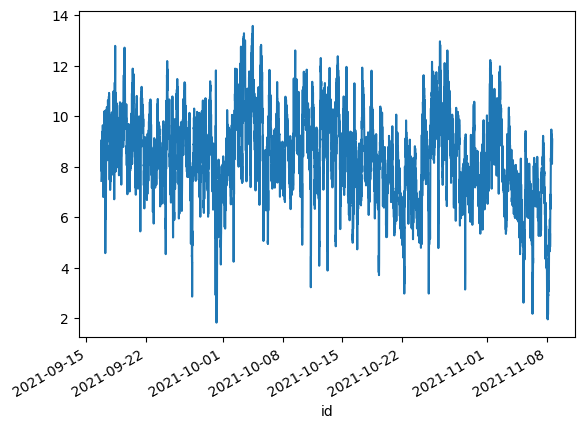

In [ ]:
df.index = pd.to_datetime(df['id'], errors='ignore')
df.index = df['id'].apply(lambda x: pd.to_datetime(str(x).split('.')[0], errors='ignore'))

df

temp = df['ws40']

temp.plot()

In [ ]:
def df_to_X_y(df, window_size=36):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X1, y1 = df_to_X_y(temp, 36)
X1.shape, y1.shape

((7525, 36, 1), (7525,))

In [ ]:
X_train1, y_train1 = X1[:6500], y1[:6500]
X_val1, y_val1 = X1[6500:7100], y1[6500:7100]
X_test1, y_test1 = X1[7100:], y1[7100:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((6500, 36, 1), (6500,), (600, 36, 1), (600,), (425, 36, 1), (425,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((36, 1)))
model1.add(LSTM(128))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │           1,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,601 (264.07 KB)

 Trainable params: 67,601 (264.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp1 = ModelCheckpoint('model1.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp1])

Epoch 1/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 52.8919 - root_mean_squared_error: 7.2134 - val_loss: 4.3246 - val_root_mean_squared_error: 2.0796
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 4.0451 - root_mean_squared_error: 1.9950 - val_loss: 1.0540 - val_root_mean_squared_error: 1.0266
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 1.3655 - root_mean_squared_error: 1.1670 - val_loss: 0.6027 - val_root_mean_squared_error: 0.7764
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.8884 - root_mean_squared_error: 0.9421 - val_loss: 0.5146 - val_root_mean_squared_error: 0.7174
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.6985 - root_mean_squared_error: 0.8357 - val_loss: 0.4505 - val_root_mean_squared_error: 0.6712
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 0.6478 - root_mean_squared_error: 0.8045 - val_loss: 0.4228 - val_root_mean_squared_error: 0.6502
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1.keras')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step


,Train Predictions,Actuals
0,7.947904,8.48
1,8.271496,8.97
2,8.676634,8.87
3,8.727408,8.79
4,8.703773,8.36
...,...,...
6495,10.367463,9.64
6496,9.958177,9.79
6497,9.866652,10.26
6498,10.078137,11.38


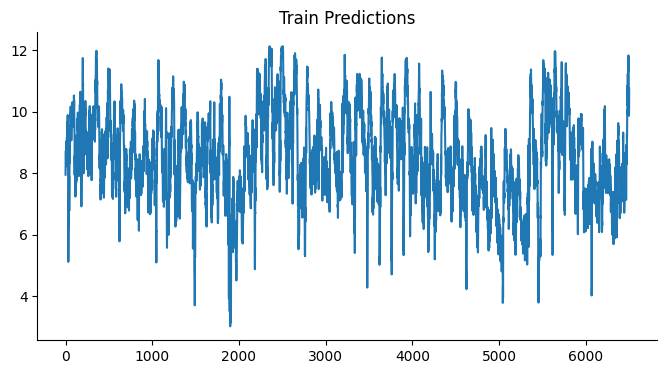

In [ ]:
# @title Train Predictions

from matplotlib import pyplot as plt
train_results['Train Predictions'].plot(kind='line', figsize=(8, 4), title='Train Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

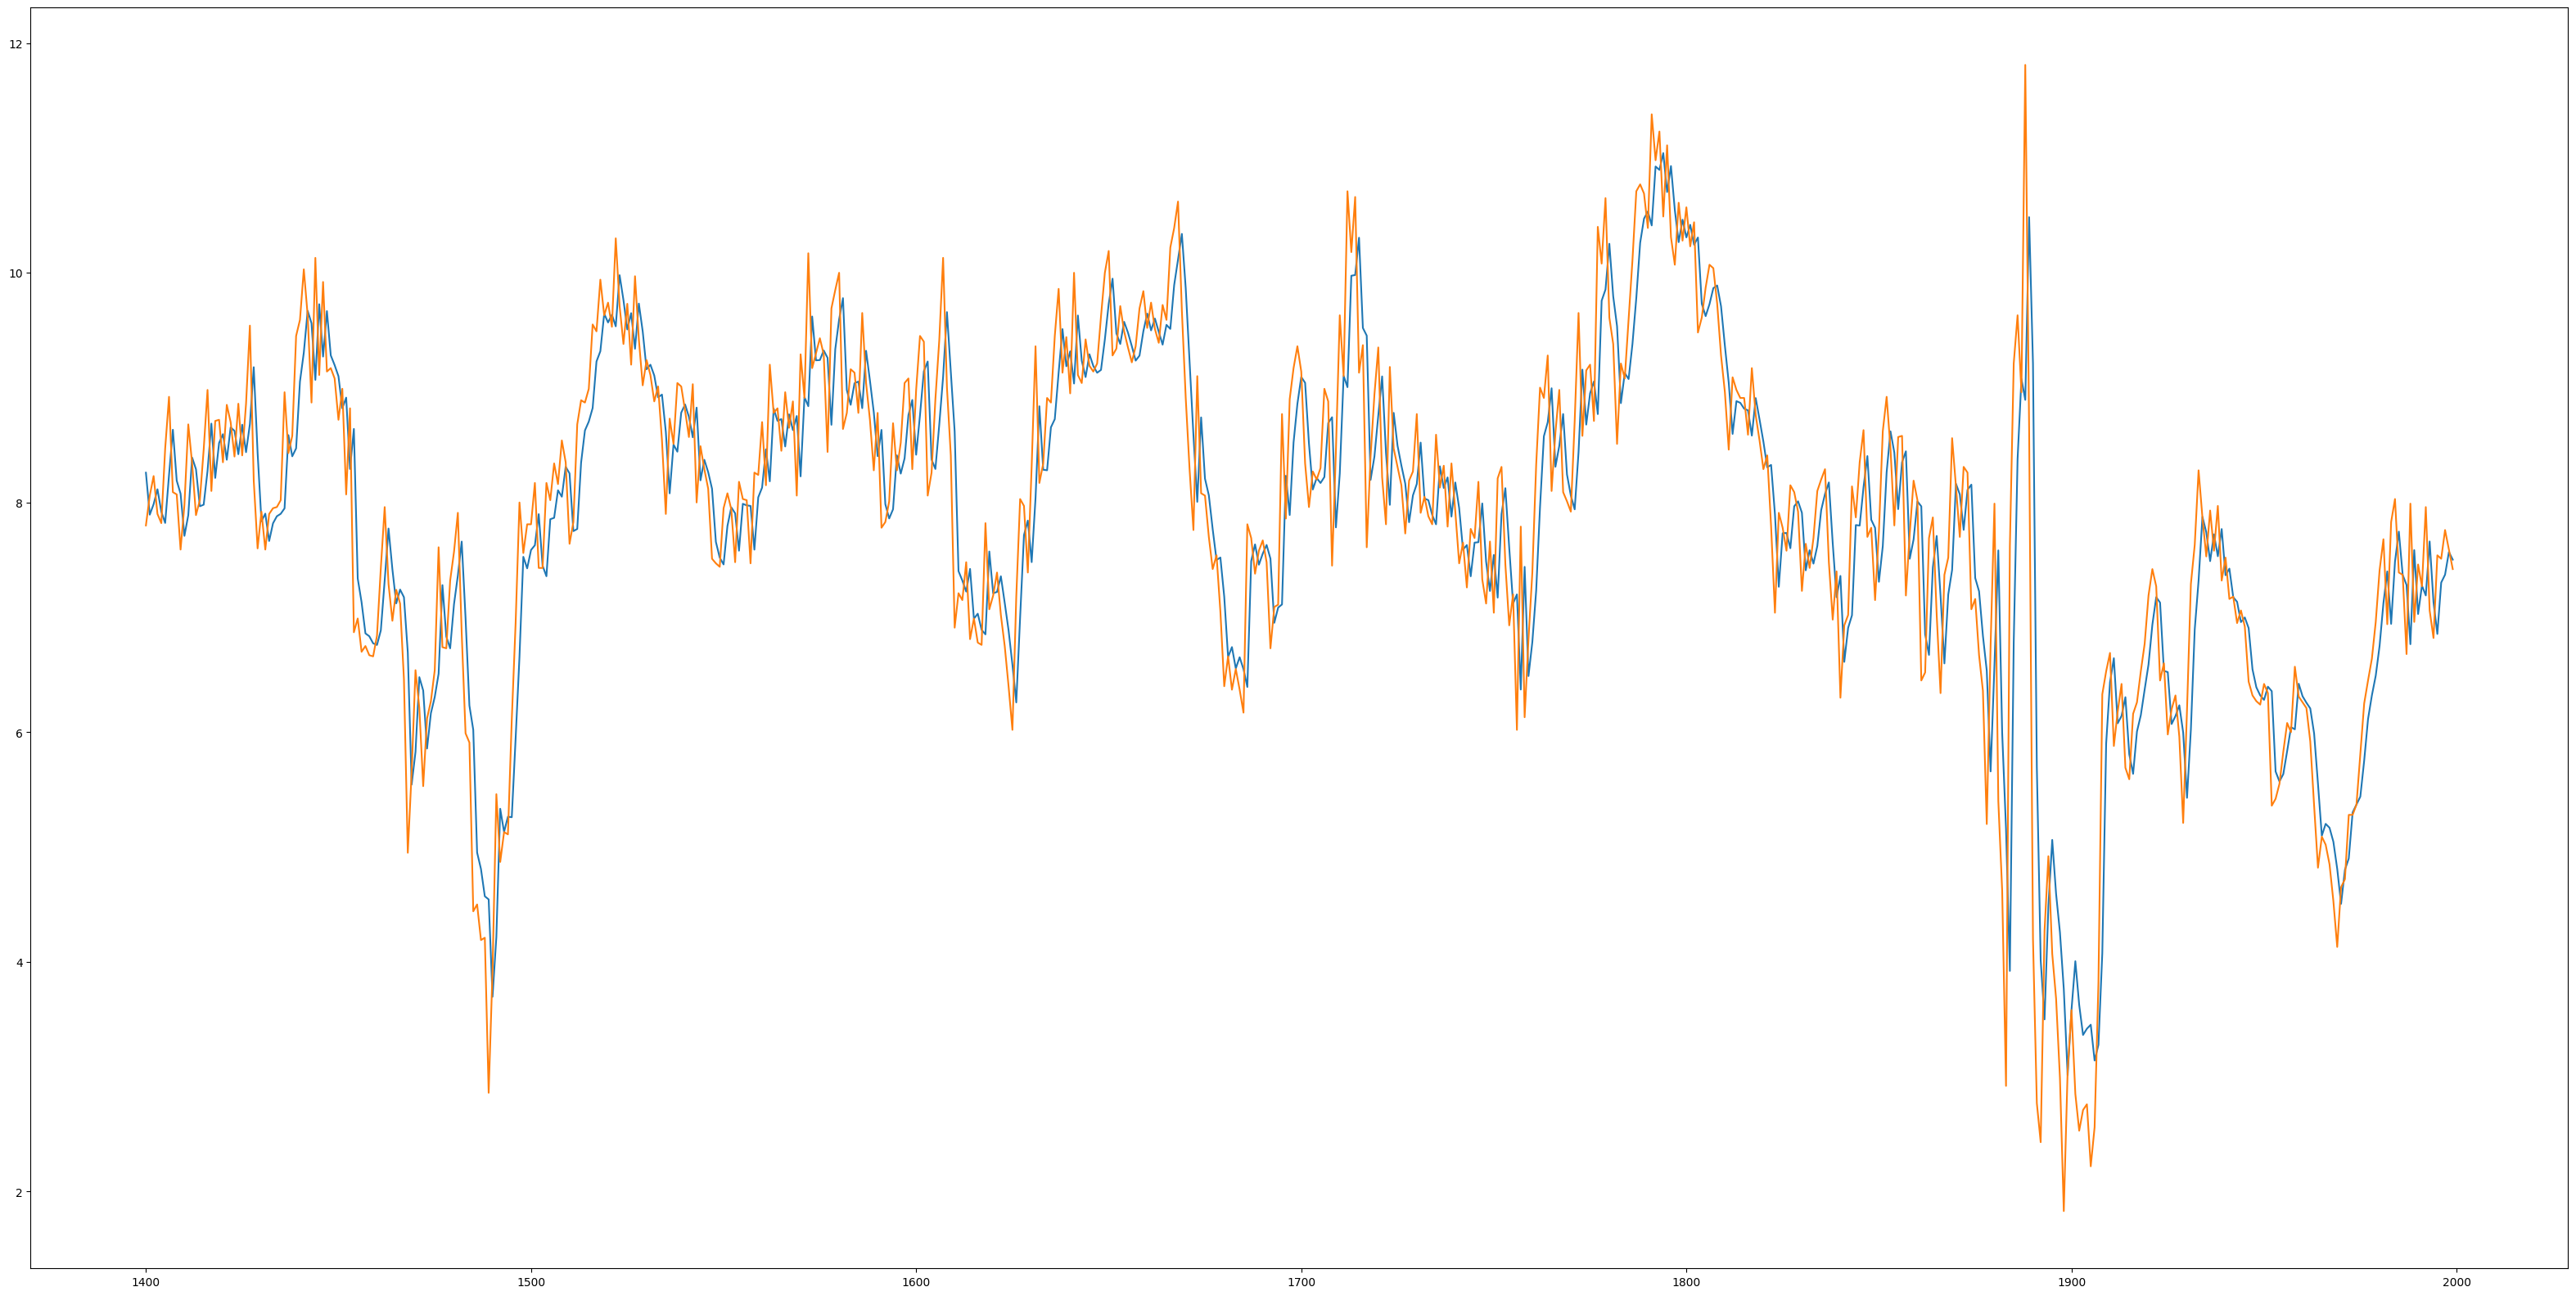

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 20))
plt.plot(train_results['Train Predictions'][1400:2000])
plt.plot(train_results['Actuals'][1400:2000])


